In [16]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=100,n_features=2,n_informative=2,n_classes=2,random_state=21,n_redundant=0,
                        n_clusters_per_class=1,hypercube=False,class_sep=20,flip_y=0)

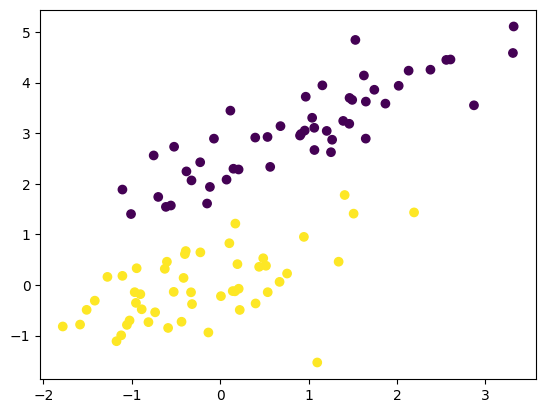

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X[:,1],X[:,0],c=y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
import numpy as np

#### Batch Gradient Descent

In [26]:
class LogisticBR:
    def __init__(self,epochs,lr):
        self.b=None
        self.bo=None
        self.epochs=epochs
        self.lr=lr
    def fit(self,X_train,y_train):
        #Initializing coefficients
        self.b=np.ones(X.shape[1])
        #Initializing intercept
        self.b0=0
        w=[]
        l=[]
        for i in range(self.epochs):
            #Predicting output with initialized parameters and finding out loss for optimization
            y_pred=np.dot(self.b,X_train.T)+self.b0
            y_hat=1/(1+np.exp(-y_pred))
            loss=-(y_train.reshape(-1,1)*np.log(y_hat.reshape(-1,1))+(1-y_train.reshape(-1,1))*np.log(1-y_hat.reshape(-1,1)))\
                  .mean()
            l.append(loss)
            #Updating coefficients through partial differentiation w.r.t each parameter for minimal loss
            self.b=self.b+self.lr*(np.dot((y_train-y_hat).reshape(-1,1).T,X_train)/X_train.shape[0]).flatten()
            #Updating intercept
            self.b0=self.b0+self.lr*(y_train-y_hat).mean()
            w.append(self.b)
        return l,w
    def predict(self,X_test):
        #predicting output with parameters that gave minimal loss for reaching approximate real output value
        z=np.dot(self.b,X_test.T)+self.b0
        return 1/(1+np.exp(-z))

In [28]:
lor=LogisticBR(100,0.01)
loss,par=lor.fit(X_train,y_train)

In [22]:
from sklearn.metrics import accuracy_score,precision_score
y_pred_prob=lor.predict(X_test)
y_pred=np.where(y_pred_prob>=0.5,1,0)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.65
1.0


<Axes: >

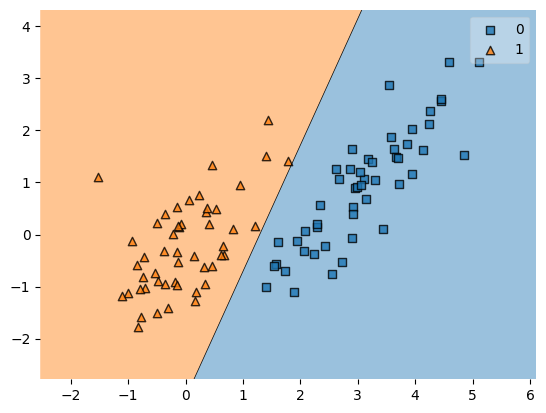

In [100]:
from mlxtend.plotting import plot_decision_regions as pdr
pdr(X,y,clf=lor)

#### Stochastic Gradient Descent

In [101]:
class LogisticSR:
    def __init__(self,epochs,lr):
        self.b=None
        self.b0=None
        self.epochs=epochs
        self.lr=lr
    def fit(self,X_train,y_train):
        #Initializing coefficients
        self.b=np.ones(X.shape[1])
        #Initializing intercept
        self.b0=0
        for i in range(self.epochs):
            #Iterating through each row
            for j in range(X_train.shape[0]):
                #Selecting a row at random
                r=np.random.randint(0,X_train.shape[0])
                row=X_train[r]
                #Predicting output with initialized parameters and finding out loss for optimization
                y_pred = np.dot(self.b, row) + self.b0
                y_hat=1/(1+np.exp(-y_pred))
                loss=-y_train[r]*np.log(y_hat)-(1-y_train[r])*np.log(1-y_hat)
                #Updating coefficients through partial differentiation w.r.t each parameter for minimal loss
                self.b=self.b+self.lr*(y_train[r]-y_hat)*row
                #Updating intercept
                self.b0=self.b0+self.lr*(y_train[r]-y_hat)
        print(loss)
    def predict(self,X_test):
        #predicting output with parameters that gave minimal loss for reaching approximate real output value
        z=np.dot(self.b,X_test.T)+self.b0
        return 1/(1+np.exp(-z))

In [106]:
losr=LogisticSR(50,0.05)
losr.fit(X_train,y_train)

0.01376280481427255


In [50]:
y_pred_prob=lor.predict(X_test)
y_pred=np.where(y_pred_prob>=0.5,1,0)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

1.0
1.0


<Axes: >

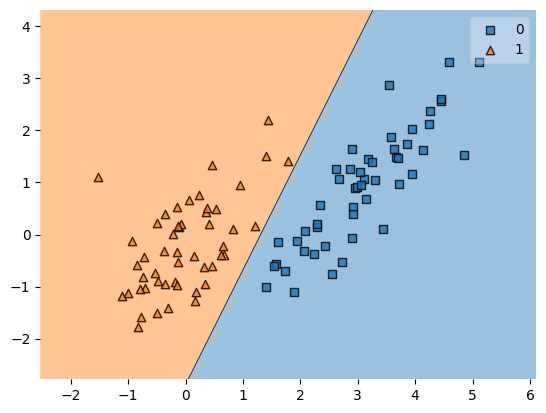

In [107]:
from mlxtend.plotting import plot_decision_regions as pdr
pdr(X,y,clf=losr)